# Generate the Data

In [1]:
from sklearn.datasets import make_classification 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,Y = make_classification(n_classes=2 , n_samples=400,n_features=2,n_informative=2,n_redundant=0,random_state=20)

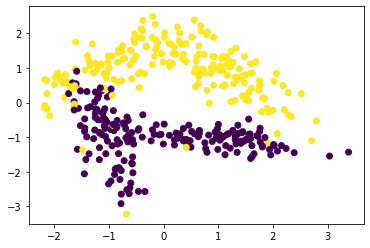

In [3]:
Y[Y==0] = -1
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

# Defining SVM class

In [4]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
    
    
    def hingeLoss(self,W,b,X,Y):
        m = X.shape[0]
        loss = 0.0
        
        loss += 0.5*np.dot(W,W.T)
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T) + b)
            loss += self.C*max(0,(1-ti))
        
        return loss[0][0]
    
    def fit(self,X,Y,lr=0.001,batch_size=100,maxItr=150):
        n_samples,n_features = X.shape
        n = lr
        c = self.C
        
        W  = np.zeros((1,n_features))
        b = 0
        
        #Start training 
        
        # Performing Batch Gradient Descent
        losses = []
        
        for k in range(maxItr):
            
            loss = self.hingeLoss(W,b,X,Y)
            losses.append(loss)
            # initialising the random shuffled batch
            ids = np.arange(n_samples)
            np.random.shuffle(ids)
            
            for batch_start in range(0,n_samples,batch_size):
                #gradient of W and bias

                gradw = 0
                gradb = 0

                #iterating on the random shuffled batch
                for j in range(batch_start,batch_start + batch_size):
                    if j < n_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)  + b)

                        if ti > 1:
                            gradw += 0 
                            gradb += 0
                        else:
                            #after differentiating ti
                            gradw += c*Y[i]*X[i] 
                            gradb += c*Y[i] 

                # updating the W and b in eqn E = E - learningrate*grad
                W = W - n*W + n*gradw
                b = b + n*gradb
        
        self.W = W
        self.b = b
        
        return W[0],b,losses
            

In [5]:
svm = SVM()

In [6]:
W,bias,losses = svm.fit(X,Y)

In [7]:
print( f"minimum value of loss is {losses[-1]}")

minimum value of loss is 81.97060470666746


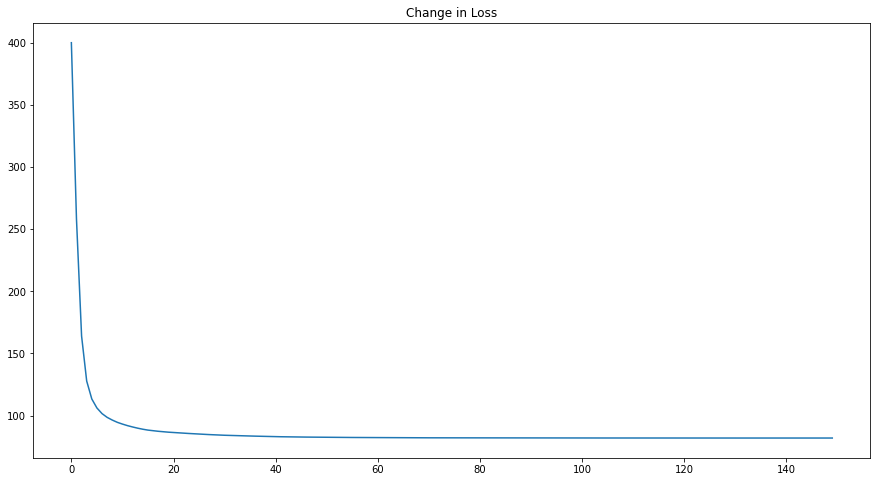

In [8]:
plt.figure(figsize=(15,8))
plt.title("Change in Loss")
plt.plot(losses)
plt.show()

In [9]:
def hyperplanePlot(X,Y,W,b):
    #Dummy points for plot of line
    x1 = np.linspace(-3,4,10)
    x2 = -(W[0]*x1 + b)/W[1]
    
    x_p = -(W[0]*x1 + b - 1)/W[1] # W1*X1 + W2*X2 + b = 1
    x_n = -(W[0]*x1 + b + 1)/W[1]# W1*X1 + W2*X2 + b = -1
    
    plt.figure(figsize=(15,8))
    plt.title("Hyperplane plot")
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.plot(x1,x2,label="W1*X1 + W2*X2 + b = 0")
    plt.plot(x1,x_p,label="W1*X1 + W2*X2 + b = 1")
    plt.plot(x1,x_n,label="W1*X1 + W2*X2 + b = -1")
    plt.legend()
    plt.show()

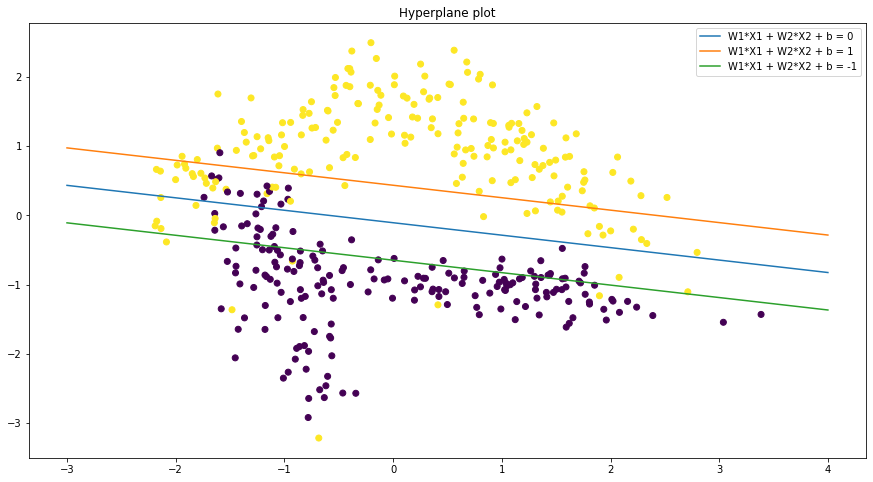

In [10]:
hyperplanePlot(X,Y,W,bias)

# SVM in non-Linear Dataset

In [11]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [12]:
X,Y = make_circles(n_samples=500,noise=0.02)

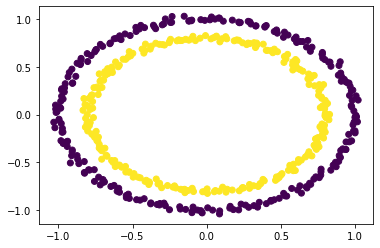

In [13]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [14]:
print(X.shape,Y.shape)

(500, 2) (500,)


## Defining Phi function to project the X to an outer space means transforming 2D to 3D

In [15]:
def phi(X):
    X3 = X[:,0]**2 + X[:,1]**2
    X_ = np.zeros((X.shape[0],3))
    
    X_[:,:-1] = X
    X_[:,-1] = X3
    
    return X_


In [16]:
X_ = phi(X)
print(X_.shape)

(500, 3)


In [17]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(X[:,0],X[:,1],X[:,2],zdir='z',s=20,c=Y,depthshade=True)
    if show:
        plt.show()
    return ax

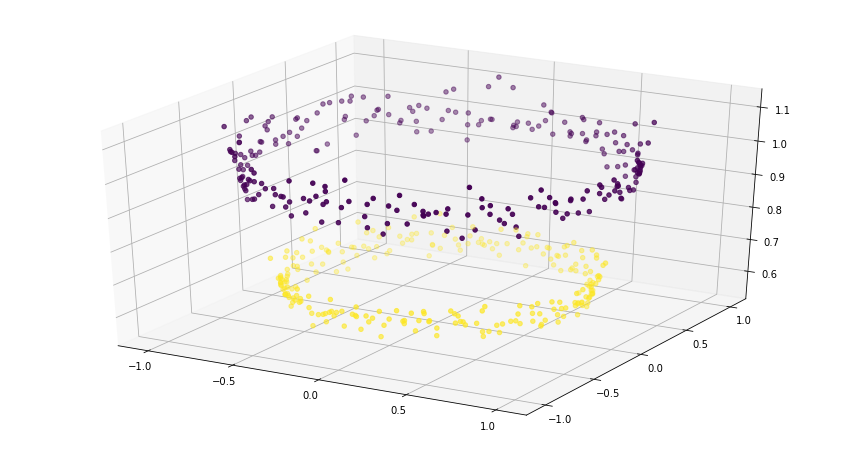

In [18]:
plot3d(X_)

# Logistic Classifier

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [20]:
lr = LogisticRegression()

In [21]:
acc = cross_val_score(lr,X,Y,cv=5).mean() #accuracy for the 2D dataset

In [22]:
print(f"Accuracy if dataset is not projected on 3d space is : {acc*100}") #Which is very low

Accuracy if dataset is not projected on 3d space is : 43.60000000000001


In [23]:
acc = cross_val_score(lr,X_,Y,cv=5).mean() #accuracy for the 3D dataset

In [24]:
print(f"Accuracy when dataset is projected on 3d space : {acc*100}") #Far better

Accuracy when dataset is projected on 3d space : 100.0


# Visualising the hyperplane for the 3d projected dataset on non-linear dataset

In [25]:
lr.fit(X_,Y)

LogisticRegression()

In [26]:
W = lr.coef_[0]
bias = lr.intercept_
print(W,bias)

[-5.75119085e-03 -1.13064899e-03 -1.09165892e+01] [8.94832154]


In [27]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))

In [28]:
print(xx,yy) # initialise a matrix

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]] [[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [29]:
z = -(W[0]*xx + W[1]*yy + bias)/W[2] # findind points of z according to ax + by + cz + d = 0
print(z)

[[0.8209602  0.82043336 0.81990653 0.8193797 ]
 [0.82085662 0.82032979 0.81980296 0.81927613]
 [0.82075305 0.82022622 0.81969939 0.81917256]
 [0.82064948 0.82012265 0.81959582 0.81906899]]


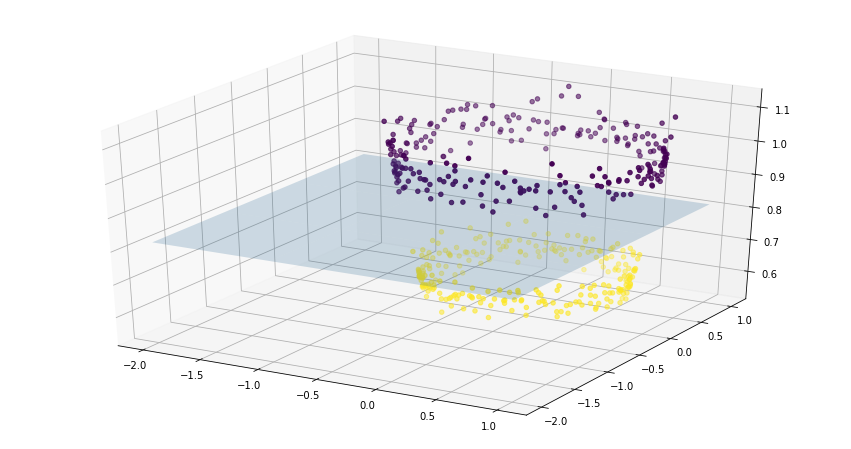

In [30]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

# Kernel Based SVM
<ul>
    <li>
        Linear Kernel
    </li>
    <li>
        RBF Kernel
    </li>
    <li>
        Ploynomial Kernel
    </li>    
</ul>

### RBF Kernel on 2D concetric circles

In [31]:
from sklearn import svm
svc = svm.SVC(kernel="rbf")

In [32]:
svc.fit(X,Y)

SVC()

In [33]:
svc.score(X,Y)

1.0

### Ploynomial Kernel on 2D concentric circles

In [34]:
svc = svm.SVC(kernel="poly")

In [35]:
svc.fit(X,Y)

SVC(kernel='poly')

In [36]:
svc.score(X,Y)

0.562

### Linear Kernel on 2D concentric circles

In [37]:
svc = svm.SVC(kernel="linear")

In [38]:
svc.fit(X,Y)

SVC(kernel='linear')

In [39]:
svc.score(X,Y)

0.506

### Custom Kernel on 2D Concentric Circles

In [40]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

In [41]:
svc = svm.SVC(kernel=custom_kernel)

In [42]:
svc.fit(X,Y)

SVC(kernel=<function custom_kernel at 0x000002B30B9BAF70>)

In [43]:
svc.score(X,Y)

1.0

## Grid Search for Better Accuracy and Selection of Hyperplan

In [44]:
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [84]:
#Different value of penalty and kernels to try and find bes possible kernel and penalty with better accuracy
params = [
    {
        'kernel' : ['linear', 'rbf' , 'poly' , 'sigmoid'],
        'C': [0.1, 0.2 , 0.5 , 1.0 , 2.0 , 5.0]
    }
]

## Data set Prepration

In [85]:
data = load_digits()
X = data.data
Y = data.target

In [86]:
print(X.shape,Y.shape)

(1797, 64) (1797,)


## Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [88]:
lr = LogisticRegression(solver='lbfgs', max_iter=2900)
lr.fit(X,Y)
cross_val_score(lr,X,Y,cv=5,scoring='accuracy').mean()

0.914317548746518

### Logistic Regression is giving around 91% accuracy

In [89]:
svc = svm.SVC()

In [90]:
svc.fit(X,Y)

SVC()

In [91]:
cross_val_score(svc,X,Y,cv=5,scoring='accuracy').mean()

0.9632838130609718

## Grid search Params 

In [92]:
gs = GridSearchCV(estimator=svm.SVC(),param_grid=params,scoring='accuracy',cv=5,n_jobs=-1)

In [93]:
gs.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 0.2, 0.5, 1.0, 2.0, 5.0],
                          'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}],
             scoring='accuracy')

In [94]:
gs.best_estimator_

SVC(C=5.0)

In [95]:
gs.best_score_

0.9738502011761063

In [96]:
gs.best_params_

{'C': 5.0, 'kernel': 'rbf'}

### Grid Search is giving best accuracy on penalty cost of 5 and rbf kernel